In [15]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import json
import seaborn as sns

from src.data.dataset_info import datasets
from sklearn.feature_selection import VarianceThreshold

var_threshold = 0.00
corr_threshold = 0.75

dataset = datasets[0]
name = dataset.name
print("dataset: {}".format(name))
path = "./datasets/preprocessed/{}.pkl".format(name)
# graph_path = "./datasets/preprocessed/graph_{}.gexf".format(name)
df = pd.read_pickle(path)

df.drop(dataset.drop_columns, axis=1, inplace=True)
df.drop(dataset.label_col, axis=1, inplace=True)

dataset: cic_ton_iot


In [16]:
# Create a VarianceThreshold object
selector = VarianceThreshold(threshold=var_threshold)

# Fit the selector to the data and transform the data
data_filtered = selector.fit_transform(df)

# Get the names of the selected features
selected_features = df.columns[selector.get_support(indices=True)]

dropped_features = [col for col in df.columns if col not in selected_features]

# Create a new DataFrame with the selected features
data_filtered = pd.DataFrame(df, columns=selected_features)

# variances = np.var(df, axis=0)

print(f"==>> dropped_features by VarianceThreshold: {dropped_features}")

==>> dropped_features by VarianceThreshold: ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'URG Flag Cnt', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Subflow Bwd Pkts']


Text(0.5, 1.0, 'Correlation Matrix Heatmap in dataset cic_ton_iot')

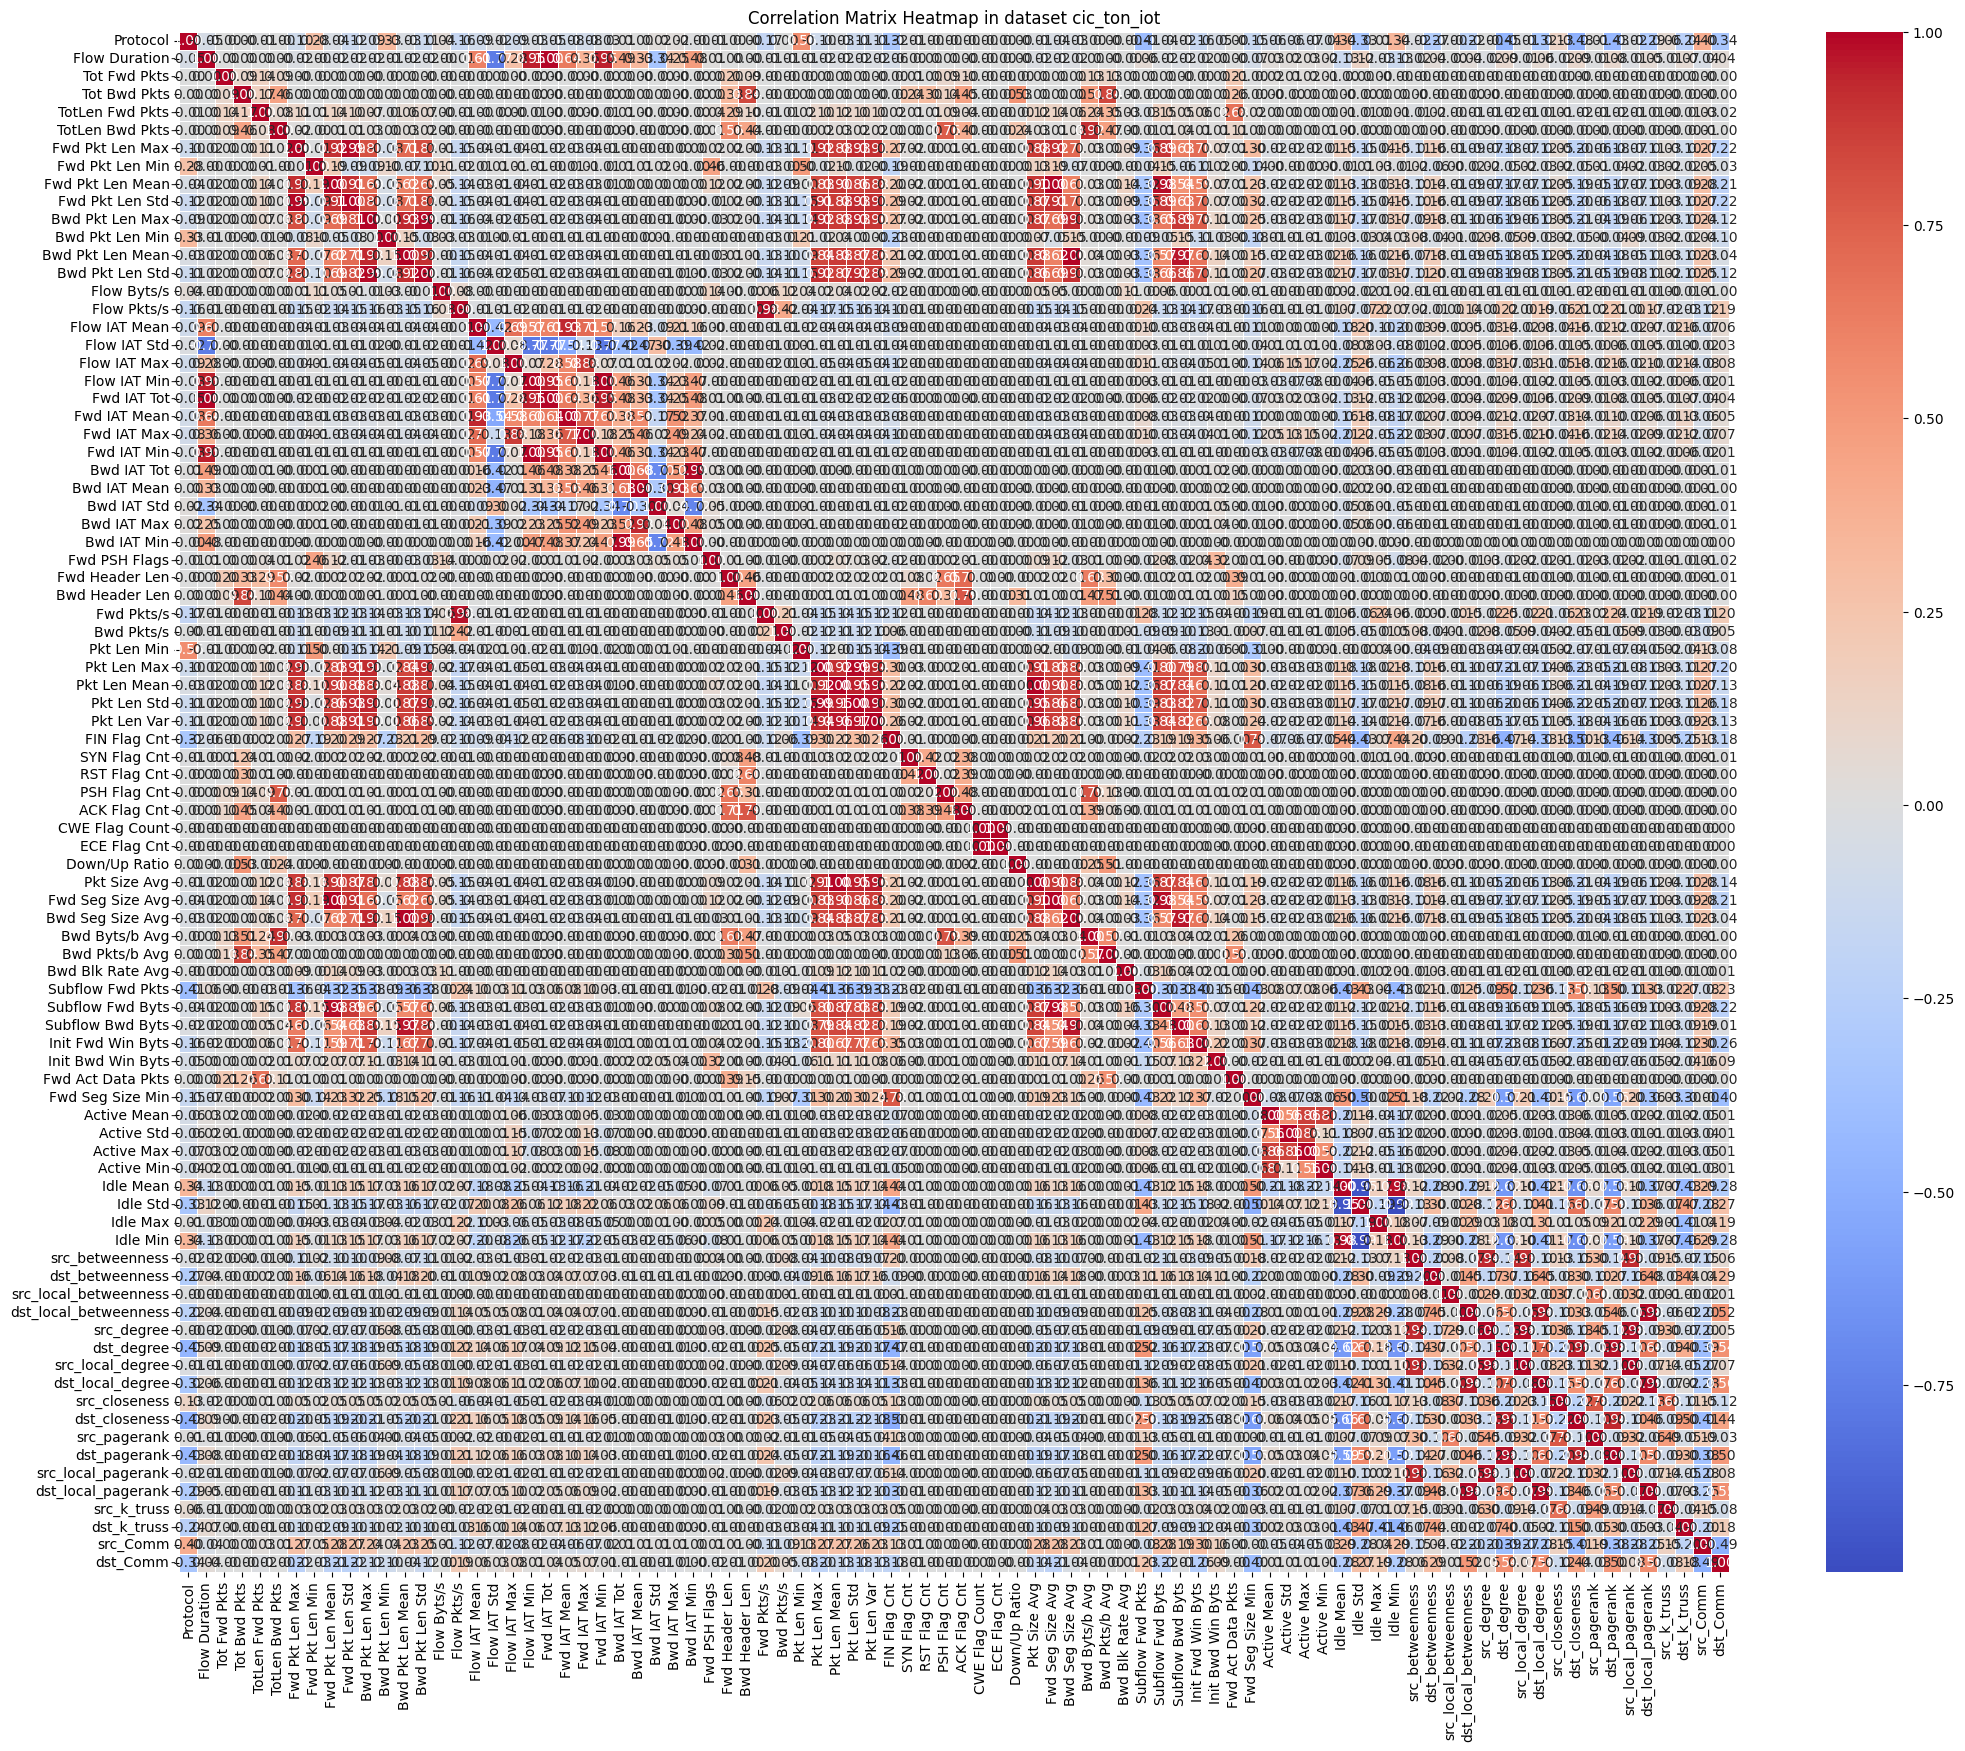

In [17]:
corr_matrix = data_filtered.corr()


plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
            fmt='.2f', linewidths=.5)  # type: ignore
plt.title("Correlation Matrix Heatmap in dataset {}".format(dataset.name))
# plt.savefig(fname="visualization/{}/correlation_matrix".format(dataset.name))


In [18]:
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
correlated_features = [
    column for column in upper.columns if any(upper[column] > corr_threshold)]

# Drop only one feature from each highly correlated pair
features_to_remove = set()
for feature in correlated_features:
    correlated_with_feature = list(
        upper.index[upper[feature] > corr_threshold])
    for correlated_feature in correlated_with_feature:
        if correlated_feature not in features_to_remove:
            features_to_remove.add(correlated_feature)
            # features_to_remove.add(np.random.choice([feature, correlated_feature]))


# Drop the highly correlated features
data_filtered = data_filtered.drop(features_to_remove, axis=1)  # type: ignore

print(f"==>> dropped_features by correlation: {features_to_remove}")

==>> dropped_features by correlation: {'dst_degree', 'src_betweenness', 'Flow IAT Mean', 'dst_local_degree', 'Fwd Pkt Len Max', 'Flow IAT Max', 'Active Std', 'Bwd Header Len', 'Tot Bwd Pkts', 'Bwd Pkt Len Mean', 'Pkt Size Avg', 'dst_local_betweenness', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'CWE Flag Count', 'src_closeness', 'Bwd IAT Tot', 'Fwd IAT Mean', 'Fwd Pkt Len Std', 'Pkt Len Mean', 'Flow IAT Min', 'TotLen Bwd Pkts', 'src_degree', 'Bwd Pkt Len Max', 'Pkt Len Var', 'src_local_degree', 'FIN Flag Cnt', 'Bwd IAT Mean', 'Idle Mean', 'Pkt Len Max', 'Flow Pkts/s', 'Flow Duration', 'Pkt Len Std', 'Fwd IAT Tot', 'PSH Flag Cnt', 'dst_closeness', 'Active Mean', 'Bwd Pkt Len Std', 'Fwd Pkt Len Mean'}


In [19]:
print(f"==>> final_features_names: {list(data_filtered.columns)}")

==>> final_features_names: ['Protocol', 'Tot Fwd Pkts', 'TotLen Fwd Pkts', 'Fwd Pkt Len Min', 'Bwd Pkt Len Min', 'Flow Byts/s', 'Flow IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'SYN Flag Cnt', 'RST Flag Cnt', 'ACK Flag Cnt', 'ECE Flag Cnt', 'Down/Up Ratio', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Max', 'Active Min', 'Idle Std', 'Idle Max', 'Idle Min', 'dst_betweenness', 'src_local_betweenness', 'src_pagerank', 'dst_pagerank', 'src_local_pagerank', 'dst_local_pagerank', 'src_k_truss', 'dst_k_truss', 'src_Comm', 'dst_Comm']


In [20]:
dropped_features.extend(list(features_to_remove))

In [22]:
print(f"==>> length of dropped_features: {len(dropped_features)}")

==>> length of dropped_features: 47


In [21]:
print(f"==>> dropped_features: {dropped_features}")

==>> dropped_features: ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'URG Flag Cnt', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Subflow Bwd Pkts', 'dst_degree', 'src_betweenness', 'Flow IAT Mean', 'dst_local_degree', 'Fwd Pkt Len Max', 'Flow IAT Max', 'Active Std', 'Bwd Header Len', 'Tot Bwd Pkts', 'Bwd Pkt Len Mean', 'Pkt Size Avg', 'dst_local_betweenness', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'CWE Flag Count', 'src_closeness', 'Bwd IAT Tot', 'Fwd IAT Mean', 'Fwd Pkt Len Std', 'Pkt Len Mean', 'Flow IAT Min', 'TotLen Bwd Pkts', 'src_degree', 'Bwd Pkt Len Max', 'Pkt Len Var', 'src_local_degree', 'FIN Flag Cnt', 'Bwd IAT Mean', 'Idle Mean', 'Pkt Len Max', 'Flow Pkts/s', 'Flow Duration', 'Pkt Len Std', 'Fwd IAT Tot', 'PSH Flag Cnt', 'dst_closeness', 'Active Mean', 'Bwd Pkt Len Std', 'Fwd Pkt Len Mean']
